In [208]:
import pandas as pd
import sklearn as sk
import scipy as sc
import scipy.stats as stats
import numpy as np
import seaborn as sns

In [5]:
from BAMT.bayesian.train_bn import structure_learning, parameter_learning
from BAMT.preprocess.discretization import get_nodes_type, discretization, code_categories, get_nodes_sign
from BAMT.bayesian.save_bn import save_structure, save_params, read_structure, read_params
from BAMT.bayesian.sampling import generate_synthetics
from BAMT.external.libpgm.hybayesiannetwork import HyBayesianNetwork
from BAMT.visualization.visualization import draw_BN

ModuleNotFoundError: No module named 'bayesian'

In [4]:
import BAMT.bayesian

In [56]:
df = pd.read_csv('../data/station_hour.csv')
df.head()

/home/ryazmax/dls/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [57]:
features = ['StationId', 'Datetime', 'NO', 'CO', 'NO2', 'O3', 'NOx', 'Benzene', 'Toluene', 'AQI', 'PM2.5', 'NH3']
len(features) - 2

10

In [58]:
df = df[features].dropna()
df.head()

,StationId,Datetime,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
16,AP001,2017-11-25 09:00:00,1.93,0.1,23.00,117.62,13.75,0.30,10.40,155.0,104.00,9.80
17,AP001,2017-11-25 10:00:00,1.33,0.1,16.25,136.23,9.75,0.28,7.10,159.0,94.50,9.65
18,AP001,2017-11-25 11:00:00,1.47,0.1,14.83,149.92,9.07,0.20,4.55,173.0,82.75,9.70
19,AP001,2017-11-25 12:00:00,5.30,0.1,21.15,156.80,15.53,0.20,4.00,184.0,79.00,9.40
21,AP001,2017-11-25 14:00:00,1.35,0.1,13.60,161.70,8.35,0.10,2.30,191.0,68.50,7.40


In [59]:
df.reset_index(drop=True, inplace=True)
df.head()

,StationId,Datetime,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
0,AP001,2017-11-25 09:00:00,1.93,0.1,23.00,117.62,13.75,0.30,10.40,155.0,104.00,9.80
1,AP001,2017-11-25 10:00:00,1.33,0.1,16.25,136.23,9.75,0.28,7.10,159.0,94.50,9.65
2,AP001,2017-11-25 11:00:00,1.47,0.1,14.83,149.92,9.07,0.20,4.55,173.0,82.75,9.70
3,AP001,2017-11-25 12:00:00,5.30,0.1,21.15,156.80,15.53,0.20,4.00,184.0,79.00,9.40
4,AP001,2017-11-25 14:00:00,1.35,0.1,13.60,161.70,8.35,0.10,2.30,191.0,68.50,7.40


In [60]:
df = df.groupby('Datetime', as_index=False).mean()
df.head()

,Datetime,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
0,2015-04-05 02:00:00,8.665,0.715,50.120,43.880,56.605,2.245,8.720,269.0,64.315,36.710
1,2015-04-05 03:00:00,11.000,0.875,50.735,44.930,62.195,2.705,11.130,248.5,67.415,34.555
2,2015-04-05 04:00:00,8.565,0.955,45.135,64.470,53.585,3.290,13.935,251.0,59.835,36.360
3,2015-04-05 05:00:00,7.680,0.795,35.390,49.535,42.720,4.075,18.015,253.5,74.330,31.680
4,2015-04-05 06:00:00,8.410,1.215,35.815,46.155,43.375,4.895,15.110,256.5,82.000,33.530


In [61]:
df.to_csv('../data/lw3.csv')

In [62]:
df = pd.read_csv('../data/lw3.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Datetime,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
0,2015-04-05 02:00:00,8.665,0.715,50.120,43.880,56.605,2.245,8.720,269.0,64.315,36.710
1,2015-04-05 03:00:00,11.000,0.875,50.735,44.930,62.195,2.705,11.130,248.5,67.415,34.555
2,2015-04-05 04:00:00,8.565,0.955,45.135,64.470,53.585,3.290,13.935,251.0,59.835,36.360
3,2015-04-05 05:00:00,7.680,0.795,35.390,49.535,42.720,4.075,18.015,253.5,74.330,31.680
4,2015-04-05 06:00:00,8.410,1.215,35.815,46.155,43.375,4.895,15.110,256.5,82.000,33.530


In [63]:
continues_fields = features[2:]
continues_fields

['NO', 'CO', 'NO2', 'O3', 'NOx', 'Benzene', 'Toluene', 'AQI', 'PM2.5', 'NH3']

In [64]:
from scipy.stats import zscore

z_scores = zscore(df[continues_fields])
# calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outliers = df[filtered_entries]

In [65]:
df_no_outliers.to_csv('../data/lw3_no_outliers.csv')

In [66]:
df = pd.read_csv('../data/lw3_no_outliers.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Datetime,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
0,2015-04-05 02:00:00,8.665,0.715,50.120,43.880,56.605,2.245,8.720,269.0,64.315,36.710
1,2015-04-05 03:00:00,11.000,0.875,50.735,44.930,62.195,2.705,11.130,248.5,67.415,34.555
2,2015-04-05 04:00:00,8.565,0.955,45.135,64.470,53.585,3.290,13.935,251.0,59.835,36.360
3,2015-04-05 05:00:00,7.680,0.795,35.390,49.535,42.720,4.075,18.015,253.5,74.330,31.680
4,2015-04-05 06:00:00,8.410,1.215,35.815,46.155,43.375,4.895,15.110,256.5,82.000,33.530


In [67]:
targets = ['AQI', 'NO', 'NOx']
predictors = list(set(continues_fields) - set(targets))
predictors

['Benzene', 'NH3', 'PM2.5', 'NO2', 'Toluene', 'O3', 'CO']

In [68]:
df_cont.count()

NO         40381
CO         40381
NO2        40381
O3         40381
SO2        40381
Benzene    40381
Toluene    40381
AQI        40381
PM2.5      40381
NH3        40381
dtype: int64

# Values sampling
We will used distribution estimation for target variables that was obtained in LW1

In [191]:
params = pd.read_csv('../data/params.csv')
params.head()

,Unnamed: 0,NOx,NO,NO2
0,a,1.558624,1.527071,2.567387
1,loc,8.895373,0.121340,6.720913
2,scale,20.590173,9.195603,10.605425


<AxesSubplot:xlabel='NO2', ylabel='Density'>

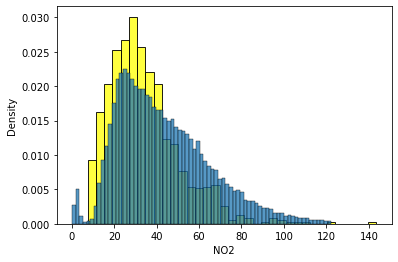

In [216]:
sampled = stats.gamma.rvs(*params['NO2'], 1000)
sns.histplot(sampled, stat='density', color='yellow')
sns.histplot(df_cont['NO2'], stat='density')

In [321]:
from scipy.interpolate import interp1d

y, x = np.histogram(df_cont['NO2'], density=True)
f = interp1d(x[:-1], y, fill_value=0, bounds_error=False)
f(x), y


(array([0.00186302, 0.01489812, 0.02035239, 0.01605698, 0.01254219,
        0.00781623, 0.00435375, 0.0022815 , 0.00113069, 0.00054321,
        0.        ]),
 array([0.00186302, 0.01489812, 0.02035239, 0.01605698, 0.01254219,
        0.00781623, 0.00435375, 0.0022815 , 0.00113069, 0.00054321]))

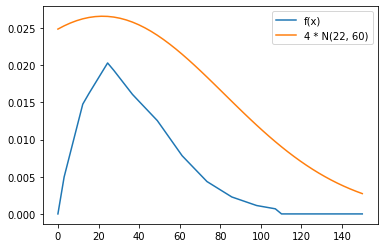

In [325]:
x = np.linspace(0, 150)
y = f(x)
m, mu, sigma = 4, 22, 60
y2 = m * stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, label='f(x)')
plt.plot(x, y2, label=f'{m} * N({mu}, {sigma})')
plt.legend()

In [326]:
def generate_reject_sampling(f, m, mu, sigma, N=10000):
    result = []
    for _ in range(N):
        candidate = np.random.normal(mu, sigma)
        prob_accept = f(candidate) / (m * stats.norm.pdf(candidate, mu, sigma))

        if np.random.random() < prob_accept:
            result.append(candidate)
    return np.array(result)

In [327]:
generated = generate_reject_sampling(f, m, mu, sigma)
generated.shape

(2520,)

<AxesSubplot:xlabel='NO2', ylabel='Density'>

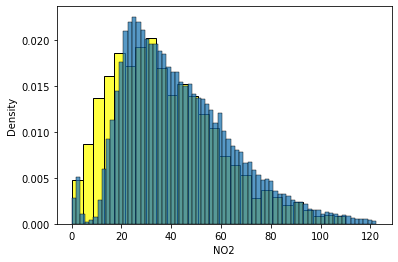

In [329]:
sns.histplot(generated, stat='density', color='yellow')
sns.histplot(df_cont['NO2'], stat='density')

# Correlation estimation
## Overall corelation

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df_cont = df[continues_fields]
df_cont.head()

,NO,CO,NO2,O3,NOx,Benzene,Toluene,AQI,PM2.5,NH3
0,8.665,0.715,50.120,43.880,56.605,2.245,8.720,269.0,64.315,36.710
1,11.000,0.875,50.735,44.930,62.195,2.705,11.130,248.5,67.415,34.555
2,8.565,0.955,45.135,64.470,53.585,3.290,13.935,251.0,59.835,36.360
3,7.680,0.795,35.390,49.535,42.720,4.075,18.015,253.5,74.330,31.680
4,8.410,1.215,35.815,46.155,43.375,4.895,15.110,256.5,82.000,33.530


<AxesSubplot:>

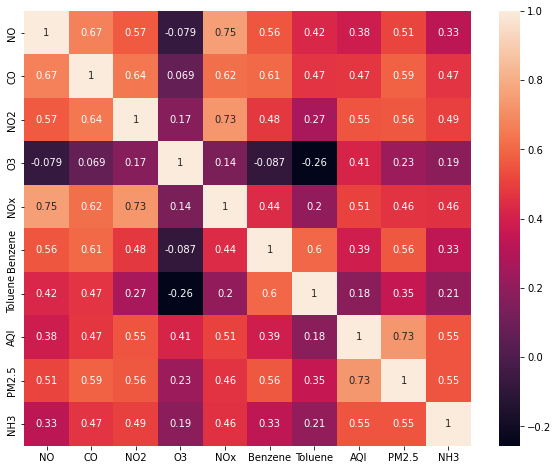

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

In [47]:
stats.pearsonr(df_cont['PM2.5'], df_cont['AQI'])

(0.725913632129718, 0.0)

## Target-predictors correlation

<AxesSubplot:>

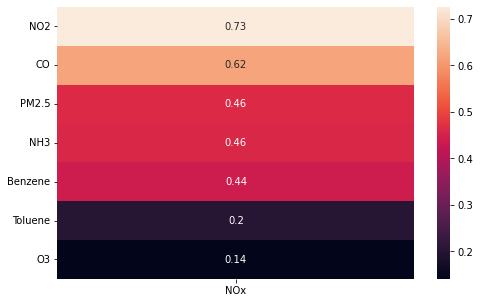

In [104]:
plt.figure(figsize=(8, 5))
corr = pd.DataFrame(df_cont[predictors].corrwith(df_cont['NOx']).sort_values(ascending=False), columns=['NOx'])
sns.heatmap(
   corr,
   annot=True
)


<AxesSubplot:>

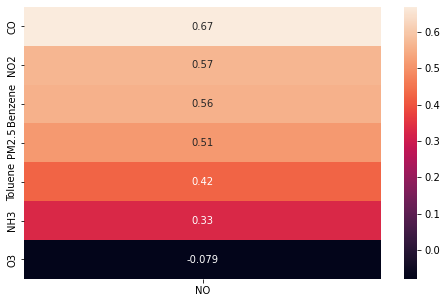

In [105]:
plt.figure(figsize=(8, 5))
corr = pd.DataFrame(df_cont[predictors].corrwith(df_cont['NO']).sort_values(ascending=False), columns=['NO'])
sns.heatmap(
   corr,
   annot=True
)

<AxesSubplot:>

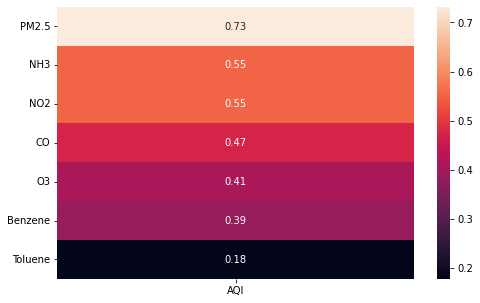

In [106]:
plt.figure(figsize=(8, 5))
corr = pd.DataFrame(df_cont[predictors].corrwith(df_cont['AQI']).sort_values(ascending=False), columns=['AQI'])
sns.heatmap(
   corr,
   annot=True
)


# Building Bayesian network based on multivariate analysis

In [107]:
import os, sys
sys.path.insert(0, './BAMT/')

In [145]:
from BAMT.preprocess.discretization import discretization, get_nodes_type, code_categories, get_nodes_sign
from BAMT.bayesian.train_bn import structure_learning, parameter_learning
from BAMT.visualization.visualization import draw_BN
from BAMT.bayesian.sampling import generate_synthetics
from BAMT.external.libpgm.hybayesiannetwork import HyBayesianNetwork
from BAMT.bayesian.save_bn import save_structure, save_params, read_structure, read_params

In [171]:
my_bn = {
    'V': continues_fields,
    'E': [
        ['PM2.5', 'AQI'],
        ['NH3', 'AQI'],
        ['NO2', 'AQI'],
        ['CO', 'NO'],
        ['NO2', 'NO'],
        ['Benzene', 'NO'],
        ['NO2', 'NOx'],
        ['CO', 'NOx'],
        ['PM2.5', 'CO'],
        ['PM2.5', 'NH3'],
        ['NO2', 'CO'],
        ['Benzene', 'CO'],
        ['Toluene', 'Benzene']
    ]
}

In [173]:
draw_BN(my_bn, nodes_type, '../results/LW3/my_bayess')
1

1

# Building Byaesian network based on structural learning

In [116]:
nodes_type = get_nodes_type(df_cont)
nodes_type

{'NO': 'cont',
 'CO': 'cont',
 'NO2': 'cont',
 'O3': 'cont',
 'NOx': 'cont',
 'Benzene': 'cont',
 'Toluene': 'cont',
 'AQI': 'cont',
 'PM2.5': 'cont',
 'NH3': 'cont'}

In [127]:
nodes_sign = get_nodes_sign(df_cont)

In [120]:
discrete_data, coder = discretization(df_cont, 'equal_frequency', columns=continues_fields)

In [163]:
bn = structure_learning(discrete_data, 'HC', nodes_type, 'K2')

In [135]:
draw_BN(bn, nodes_type, '../results/LW3/HC_MI_bayess')
1

1

In [174]:
params_mi = parameter_learning(df_cont, nodes_type, my_bn, 'simple')

In [175]:
save_structure(my_bn, 'socio_net_structure')
skel = read_structure('socio_net_structure')
save_params(params_mi, 'socio_net_param')
params = read_params('socio_net_param')
my_bn_model = HyBayesianNetwork(skel, params)

In [184]:
synth_df = generate_synthetics(bn_model, nodes_sign, 'simple', 1000)
synth_df.head()

,NO,NOx,NO2,CO,Benzene,Toluene,AQI,PM2.5,NH3,O3
0,34.694113,89.940593,70.955181,1.186144,4.138572,17.174608,391.706771,202.729959,54.337761,24.853693
1,75.433035,143.207741,93.636941,2.573867,10.512039,33.547629,288.460748,223.502771,54.088747,27.721050
2,20.106661,60.136485,44.812869,0.452960,2.922638,2.678227,73.747228,68.328987,31.381944,14.081314
3,9.907327,35.530086,18.208134,0.503946,0.635185,8.492045,335.822445,72.132366,27.688719,82.432444
4,13.812010,31.204865,56.360709,0.648626,1.505900,13.513638,280.715112,71.107681,40.753636,41.783696


# Quality analysis

<AxesSubplot:xlabel='AQI', ylabel='Density'>

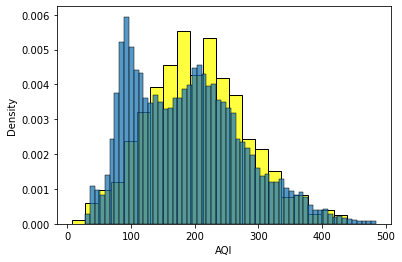

In [178]:
sns.histplot(synth_df['AQI'], stat='density', color='yellow')
sns.histplot(df_cont['AQI'], stat='density')

<AxesSubplot:xlabel='NO', ylabel='Density'>

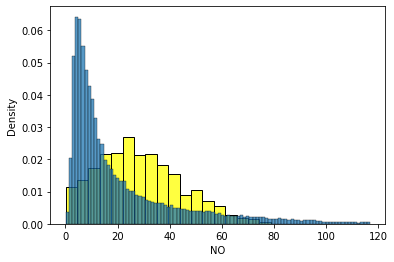

In [179]:
sns.histplot(synth_df['NO'], stat='density', color='yellow')
sns.histplot(df_cont['NO'], stat='density')

<AxesSubplot:xlabel='NOx', ylabel='Density'>

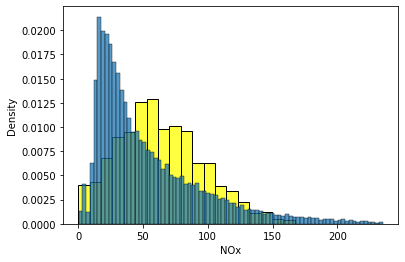

In [181]:
sns.histplot(synth_df['NOx'], stat='density', color='yellow')
sns.histplot(df_cont['NOx'], stat='density')

<AxesSubplot:xlabel='NH3', ylabel='CO'>

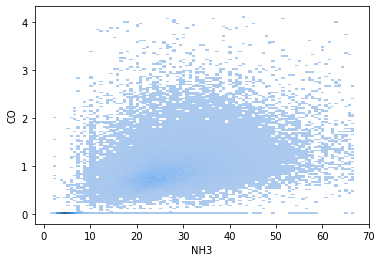

In [189]:
sns.histplot(df_cont, x='NH3', y='CO', kde=True)

<AxesSubplot:xlabel='NH3', ylabel='CO'>

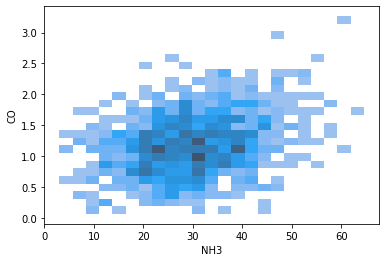

In [190]:
sns.histplot(synth_df, x='NH3', y='CO', kde=True)